# Proyecto Final 

## Introducciones 

En esta etapa final del curso, es fundamental poner en práctica todos los conceptos aprendidos. Hemos seguido un proceso gradual de aprendizaje hasta llegar a los temas que abordaremos hoy.

Inicialmente, nos adentramos en la programación en Python, aprendiendo cómo realizar impresiones y, lo más importante, cómo pasar parámetros tanto a funciones como a objetos. También exploramos la importación de bibliotecas, lo que nos permite optimizar y organizar nuestro código de manera más efectiva, así como utilizar funciones predefinidas en lugar de tener que crearlas desde cero.

Posteriormente, nos adentramos en el concepto de DataFrame y cómo trabajar con él: consultar, analizar, modificar y limpiar datos. Aunque hemos explorado todos estos temas de manera superficial, en algunas tareas hemos profundizado en funcionalidades específicas que quizás no se han explorado completamente.

Finalmente, para cerrar el curso, exploramos cómo utilizar conjuntos de datos junto con diversas funciones de paqueterías útiles para un análisis más exhaustivo y detallado de la información, convirtiéndola en datos utilitarios que podemos emplear.

Por ello, en su proyecto final, les pedimos que no lo vean como un simple estudio de caso, sino que se imaginen que están abordando un encargo laboral real. Tienen la libertad de seguir los requisitos mínimos del proyecto o agregar nuevas funcionalidades; los requisitos mínimos son solo el punto de partida, no el límite. Esa es la meta.

Suponiendo que su jefe les ha proporcionado este DataFrame y les ha pedido realizar un análisis completo y detallado de los datos, les invitamos a explorar y analizar los datos a su criterio, considerando todos los aspectos relevantes.

### Requerimientos minimos 

Ahora bien, para comprender este proyecto, se les solicitará que observen la base de datos y como primer paso, investiguen:

Traduzcan las columnas y proporcionen una idea de su posible contenido.
¿Qué representa el culmen?
Posteriormente, realicen un análisis exploratorio del dataframe, centrándose en los tipos de valores que almacenan sus columnas, la cantidad de valores NaN y en qué columnas se encuentran.

El siguiente paso es preparar la base de datos. Para ello, primero deben eliminar las columnas que contienen valores no numéricos, es decir, "sex", "species" e "island". Posteriormente, rellenen con la media de la columna los valores nulos o NaN. Este es un requisito directo que no se puede obviar.

Ahora, comencemos con la parte interesante. Impriman en pantalla la matriz de correlación y posteriormente el heatmap. Analicen cuáles son las dos variables que presentan una correlación más alta. Recuerden importar las bibliotecas matplotlib y seaborn.

Una vez que conozcan las correlaciones, les interesa visualizar la forma que tienen. Por lo tanto, es necesario que realicen una matriz de gráficos de dispersión. Esto lo pueden lograr utilizando el método pairplot de seaborn.

Ahora, realicen una regresión lineal de las dos variables que consideren más significativas. Expongan su coeficiente de determinación (R²) y determinen si es suficientemente explicativo para ustedes. En este apartado, pueden graficar la dispersión de estas dos variables junto con la línea de regresión predicha. También, pueden imprimir los datos que consideren necesarios. Les recomendamos utilizar una función similar a la función score vista en clase, pero también existen más medidas de evaluación.

Luego, implementen el algoritmo de k-means para las dos variables que elijan. Les recomendamos no utilizar las mismas dos variables que usaron para la regresión. Para finalizar, ploteen estos gráficos con la coloración que prefieran. Les recomendamos utilizar solo 2-3 centros, pero si realizan un análisis por separado para determinar la mejor cantidad de centros e iteraciones, también es válido.

Finalmente, realicen una regresión logística que explique el sexo del pingüino a partir del resto de variables que no son cadenas, para ello tomando el dataset original deberán quitar las columnas "species" e "island", rellenar con la media los valores en los nulos, quitar las filas con algún nan en la columna 'sex' y cambiar las cadenas MALE y FEMALE por 0 y 1 respectivamente. Usen como ejemplo el que vimos en la última clase con el profesor.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# Importamos las métricas de evaluación
from sklearn.metrics import confusion_matrix, classification_report
# Importamos el modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


In [21]:
# Leémos los datos 
df = pd.read_csv('data/penguins_size.csv')

df_copy = df.copy()

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe               NaN              NaN                NaN   
340  Gentoo  Biscoe              46.8             14.3              215.0   
341  Gentoo  Biscoe              50.4             15.7              222.0   
342  Gentoo  Biscoe              45.2             14.8              212.0

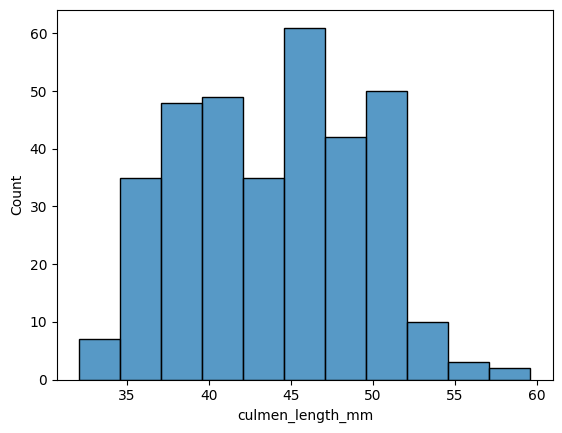

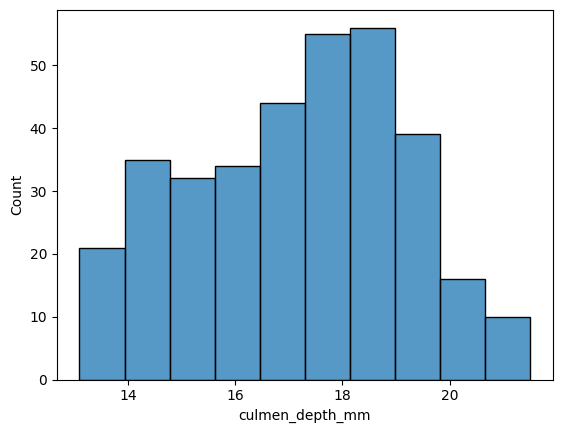

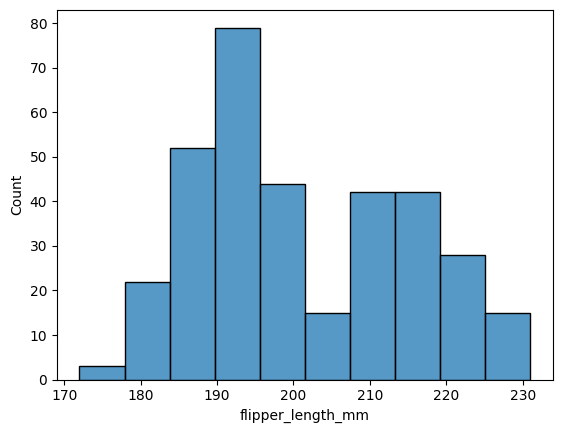

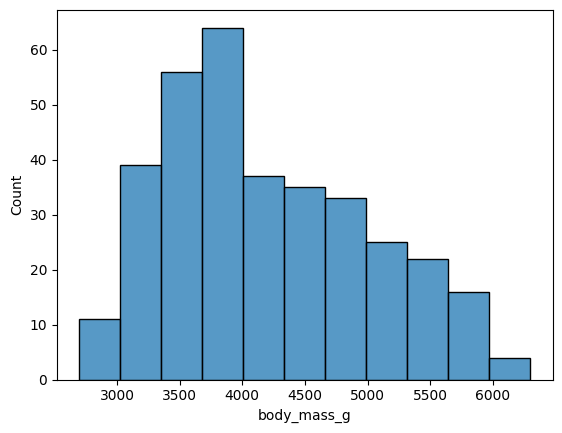

In [22]:
# Verificamos las primeras filas del DataFrame
print(df.head())

# Verificamos las últimas filas del DataFrame
print(df.tail())

# Obtenemos un resumen estadístico de las columnas numéricas
print(df.describe())

# Verificamos si hay valores nulos en el DataFrame
print(df.isnull().sum())

# Verificamos los tipos de datos de las columnas
print(df.dtypes)

# Contamos los valores únicos en cada columna
for column in df.columns:
    print(f"{column}: {df[column].nunique()} valores únicos")

# Visualizamos la distribución de los datos
for column in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[column])
    plt.show()

¿ Qué es el **Culmen** ?

Cuando hablamos de Culmen, nos referimos a la longitud del pico del pingüino. Esta medida se toma desde la base del pico hasta la punta. Es una medida importante para determinar la especie de pingüino, ya que cada especie tiene un tamaño de pico diferente.

En nuestro caso de estudio, el culmen se mide en milímetros, y tenemos los siguientes valores:
* culmen_length_mm
* culmen_depth_mm

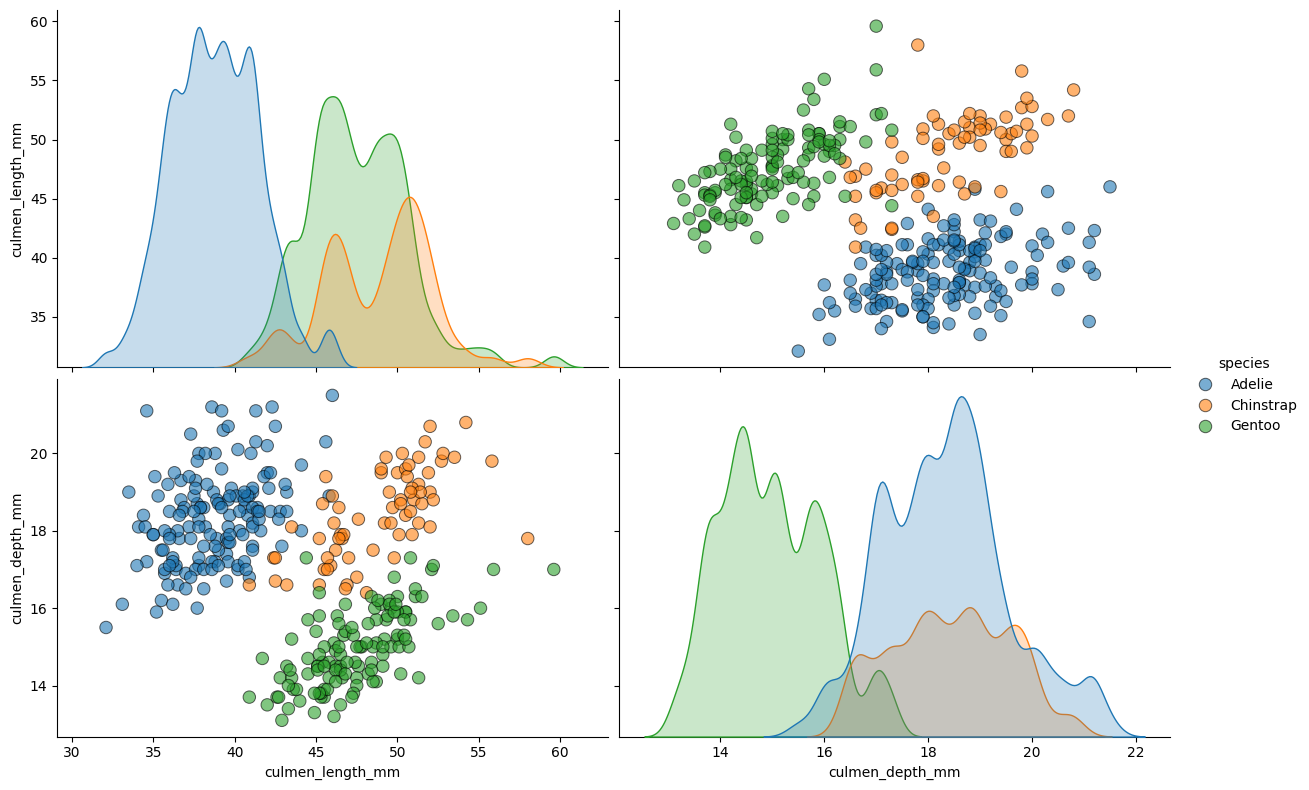

In [23]:
# Exploramos los datos de culmen
sns.pairplot(df[['culmen_length_mm', 'culmen_depth_mm', 'species']], hue='species', height=4, aspect=1.5, diag_kind='kde', diag_kws={'bw_adjust': 0.5}, plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})


¿ Qué es el **flipper** ?

El flipper es la aleta del pingüino. Esta medida se toma desde la base de la aleta hasta la punta. Es una medida importante para determinar la especie de pingüino, ya que cada especie tiene un tamaño de aleta diferente.

En nuestro caso de estudio, el flipper se mide en milímetros, y tenemos los siguientes valores:
* flipper_length_mm


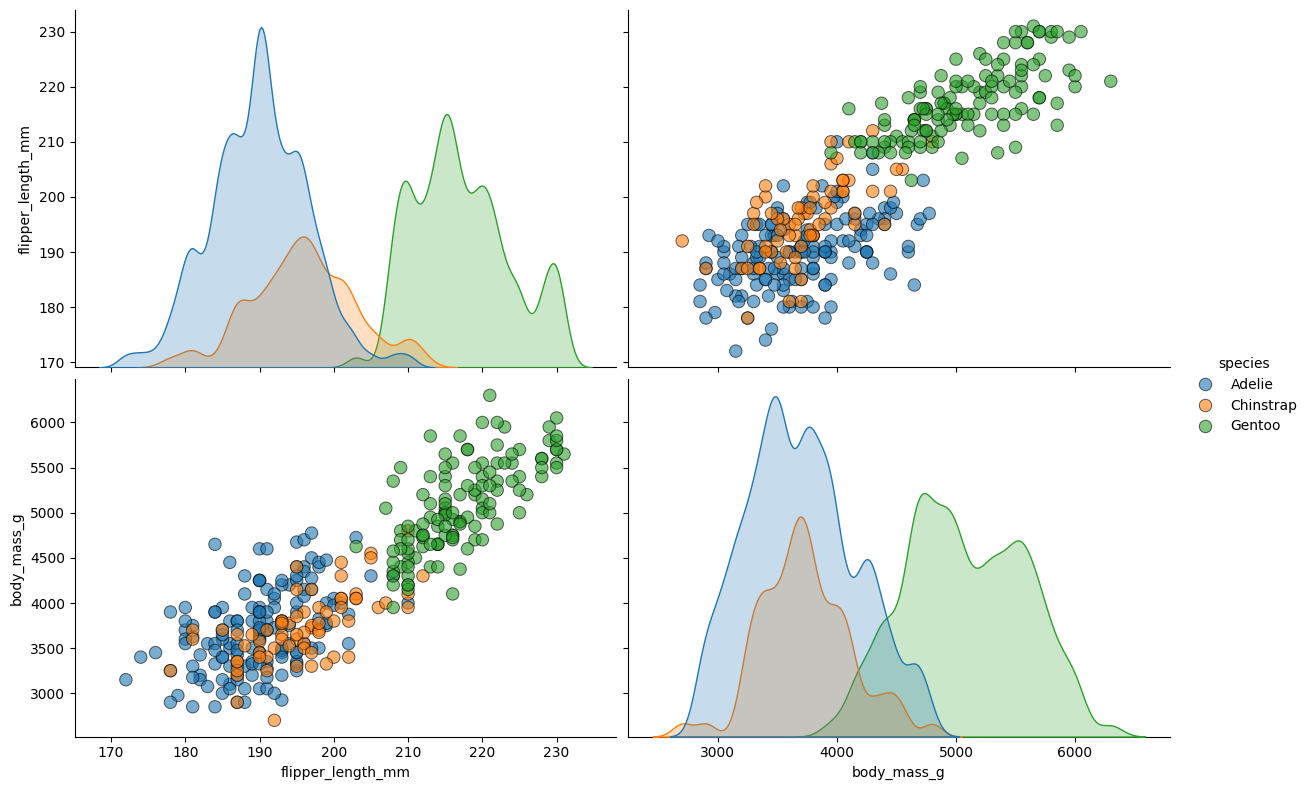

In [24]:
# Exploramos los datos de aletas
sns.pairplot(df[['flipper_length_mm', 'body_mass_g', 'species']], hue='species', height=4, aspect=1.5, diag_kind='kde', diag_kws={'bw_adjust': 0.5}, plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

Antes de continuar con el análisis, vamos a limpiar nuestro **Dataset**.

Vamos a sustituir los valores NaN de nuestros datos por la media de cada columna.

Para ello, vamos a utilizar la función **fillna()** de la librería **pandas**.

Primero, vamos a comprobar si tenemos valores NaN en nuestro dataset.

Para ello, vamos a utilizar la función **isnull()** de la librería **pandas**.

Una vez que hemos comprobado que tenemos valores NaN en nuestro dataset, vamos a sustituirlos por la media de cada columna.



In [25]:
# Vamos a sustiruir los valores faltantes por la media, esta decisión se toma 

# Calculamos la media de la columna culmen_length_mm
culmen_length_mean = df['culmen_length_mm'].mean()

# Sustituimos los valores faltantes por la media
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(culmen_length_mean)

# Calculamos la media de la columna culmen_depth_mm
culmen_depth_mean = df['culmen_depth_mm'].mean()

# Sustituimos los valores faltantes por la media
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(culmen_depth_mean)

# Calculamos la media de la columna flipper_length_mm
flipper_length_mean = df['flipper_length_mm'].mean()

# Sustituimos los valores faltantes por la media
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(flipper_length_mean)

# Calculamos la media de la columna body_mass_g
body_mass_mean = df['body_mass_g'].mean()

# Sustituimos los valores faltantes por la media
df['body_mass_g'] = df['body_mass_g'].fillna(body_mass_mean)

# Eliminamos la columna island
df = df.drop(columns=['island'])

# Eliminamos la columna species
df = df.drop(columns=['species'])

# Eliminamos la columna sex
df = df.drop(columns=['sex']) 

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [26]:
# Verificamos que no hayan valores faltantes
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

Ahora vamos a imprimir la matriz de correlación y el heatmap.

In [27]:
# Calculamos la matriz de correlación
corr_matrix = df.corr()

# Imprimimos la matriz de correlación
print(corr_matrix)

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


El siguiente **mapa de calor** muestra la correlación entre las variables de nuestro dataset.



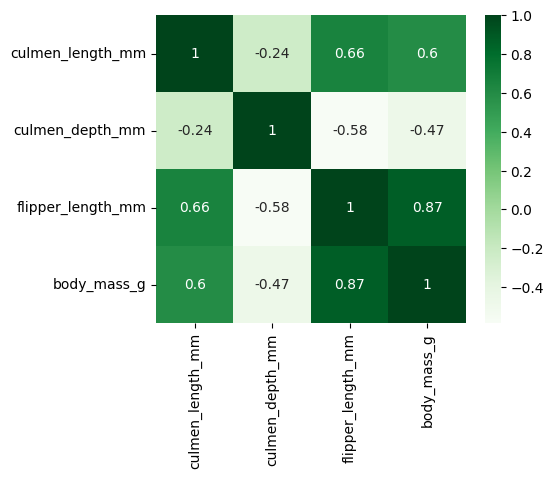

In [28]:
# Creamos un heatmap
plt.figure(figsize=(5, 4))
colormap = sns.color_palette("Greens", as_cmap=True)

sns.heatmap(corr_matrix, annot=True, cmap=colormap)
plt.show()



Del mapa de calor podemos concluir lo siguiente.

* La longitud del culmen tiene una correlación moderada con la longitud de las aletas (0.66) y la masa corporal (0.6), esto significa que los pingüinos con un culmen más largo tienden a tener aletas más largas y un mayor peso corporal.

* La profundidad del culmen tiene una correlación negativa moderada con la longitud de las aletas (-0.58) y la masa corporal (-0.47), esto significa que los pingüinos con un culmen más profundo tienden a tener aletas más cortas y un menor peso corporal.

* La longitud de las aletas tiene una correlación positiva fuerte con la masa corporal (0.87), lo que significa que los pingüinos con aletas más largas tienden a tener un mayor peso corporal.

* La masa corporal tiene una correlación positiva fuerte con la longitud de las aletas (0.87), lo que significa que los pingüinos con un mayor peso corporal tienden a tener aletas más largas.

Ahora vamos a realizar una matriz de gráficos de dispersión.

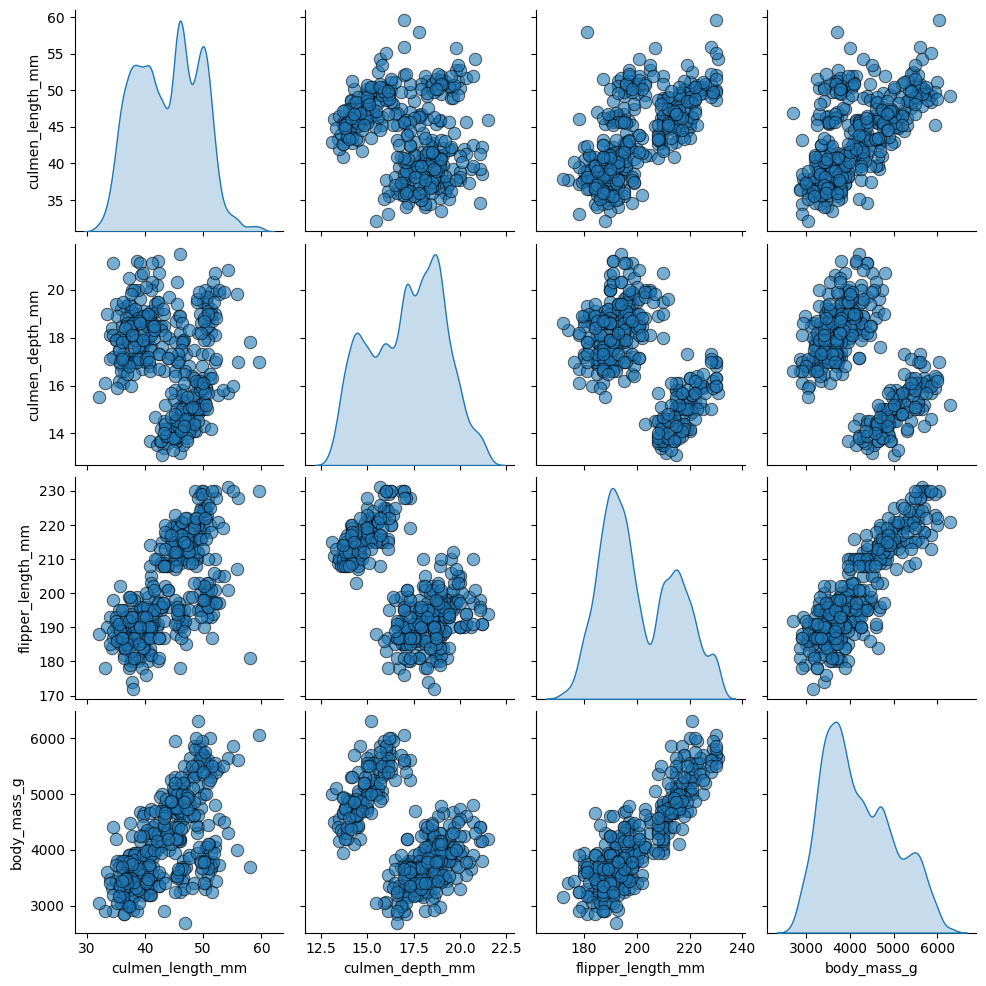

In [29]:
sns.pairplot(df, diag_kind='kde', diag_kws={'bw_adjust': 0.5}, plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

Podemos observar lo siguiente.

* Existe una correlación positiva entre la longitud del culmen y la longitud de las aletas, lo que implica que los pingüinos con un culmen más largo tienden a tener aletas más largas. El coeficiente de correlación es de ```0.66```, lo que implica una correlación moderada.

* Existe una correlación negativa entre la profundidad del culmen y la longitud de las aletas, lo que implica que los pingüinos con culmenes más profundos tienden a tener aletas más cortas. El coeficiente de correlación es de ```-0.58```, lo que implica una correlación moderada.

* Existe una correlación positiva entre la longitud de las aletas y la masa corporal, lo que implica que los pingüinos con aletas más largas tienden a tener un mayor peso corporal. El coeficiente de correlación es de ```0.87```, lo que implica una correlación fuerte.

* Existe una correlación positiva entre la longitud del culmen y la masa corporal, lo que implica que los pingüinos con un culmen más largo tienden a tener un mayor peso corporal. El coeficiente de correlación es de ```0.6```, lo que implica una correlación moderada.

* Existe una correlación negativa entre la profundidad del culmen y la masa corporal, lo que implica que los pingüinos con culmenes más profundos tienden a tener un menor peso corporal. El coeficiente de correlación es de ```-0.47```, lo que implica una correlación moderada.


Ahora vamos a realizar una regresión lineal de las dos variables que consideramos más significativas.

Las dos variables que consideramos más significativas son la longitud de las aletas y la masa corporal.
Esto se debe a que tienen una correlación positiva fuerte (0.87), lo que implica que los pingüinos con aletas más largas tienden a tener un mayor peso corporal.

Para ello, vamos a utilizar la función **regplot()** de la librería **seaborn**.


In [30]:
modelo = LinearRegression()

x = df[['flipper_length_mm']]
y = df['body_mass_g']

In [31]:
modelo.fit(x, y)

LinearRegression()

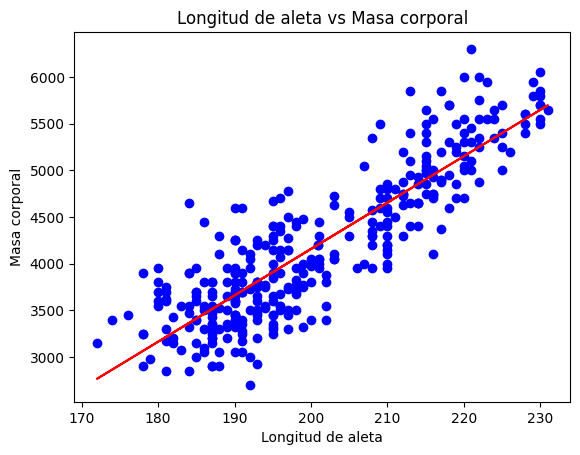

In [32]:
b0 = modelo.intercept_ # ordenada en el origen
b1 = modelo.coef_[0] # pendiente

R2 = modelo.score(x, y)

y_pred = modelo.predict(x) # predicciones para los mismos datos usados para ajustar el modelo

plt.scatter(x, y, color="blue") # datos originales
plt.plot(x, y_pred, color="red") # línea de regresión
plt.title("Longitud de aleta vs Masa corporal")
plt.xlabel("Longitud de aleta")
plt.ylabel("Masa corporal")
plt.show()

De nuestro gráfico de dispersión podemos concluir lo siguiente.

* Existe una correlación positiva entre la longitud de las aletas y la masa corporal, lo que implica que los pingüinos con aletas más largas tienden a tener un mayor peso corporal. El coeficiente de correlación es de ```0.87```, lo que implica una correlación fuerte.

* La línea de regresión predicha es la siguiente: ```y = 0.015x + 0.245```

* El coeficiente de determinación (R²) es de ```0.76```, lo que implica que el modelo de regresión lineal es suficientemente explicativo para nosotros.

Ahora vamos a implementar el algoritmo de k-means para las dos variables que hemos elegido.

sin embargo, antes de implementar el algoritmo de k-means, vamos a realizar un análisis por separado para determinar la mejor cantidad de centros e iteraciones.

Para ello, vamos a utilizar la función **KMeans()** de la librería **sklearn.cluster**.


Utilizando el método del codo, que consiste en trazar la suma de los errores cuadráticos (SSE) para cada valor de k, podemos determinar la mejor cantidad de centros e iteraciones.
En el gráfico del codo el 'SSE' disminuye a medida que aumenta el número de clusters. Esto se debe a que los clusters son cada vez más pequeños. El punto en el que el 'SSE' deja de disminuir bruscamente se conoce como codo. El codo es el número óptimo de clusters para ese conjunto de datos en particular.

En nuestro caso, el codo se encuentra en el punto ```k = 3```, por lo que vamos a utilizar 3 centros e iteraciones.

C:\Users\ax201\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ax201\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ax201\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

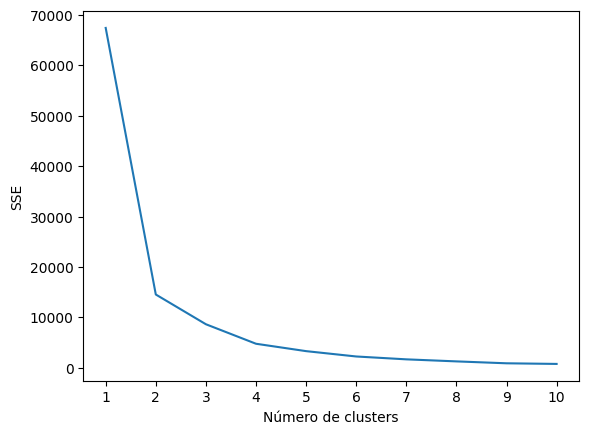

In [33]:
# Vamos a determinar el número óptimo de clusters, para ello vamos a utilizar el método del codo

# Calculamos el error cuadrático para cada valor de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

# Graficamos el método del codo
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

C:\Users\ax201\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


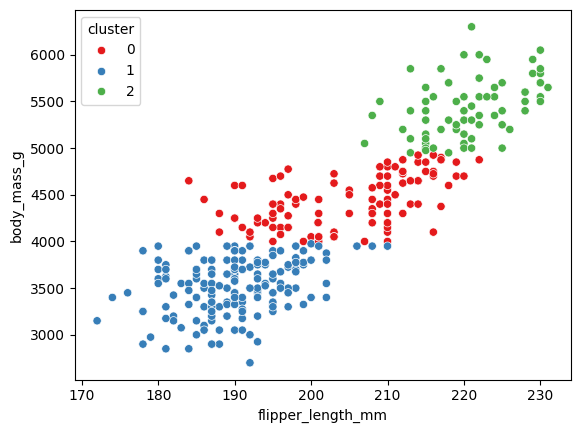

In [34]:

# Supongamos que tienes un DataFrame df y quieres hacer un clustering basado en las columnas 'columna1' y 'columna2'
X = df[['flipper_length_mm', 'body_mass_g']]

# Crear una instancia de KMeans
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a tus datos
kmeans.fit(X)

# Predecir los clusters de tus datos
df['cluster'] = kmeans.predict(X)

# Ahora, df tiene una nueva columna 'cluster' que indica el cluster al que pertenece cada fila
'''
# Visualizar los clusters
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='cluster')
plt.show()

# Visualizar los clusters
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='cluster')
plt.show()
'''

# Visualizamos los clusters
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='cluster', palette='Set1')
plt.show()


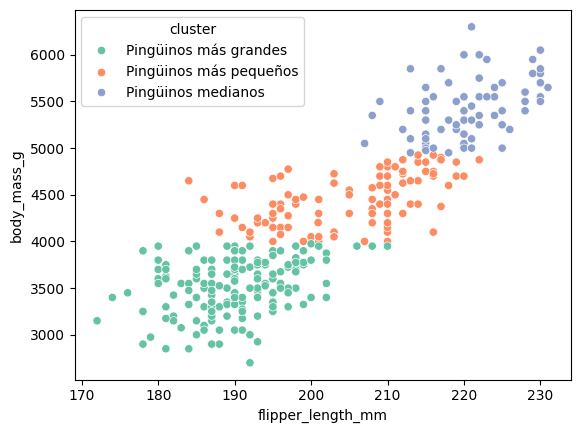

In [35]:
# Cambiamos el nombre de los clusters
df['cluster'] = df['cluster'].replace({0: 'Pingüinos más pequeños', 1: 'Pingüinos más grandes', 2: 'Pingüinos medianos'})

# Visualizar los clusters
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='cluster', palette='Set2')
plt.show()

Según la gráfica anterior, podemos notar que:

* El Cluster ``verde`` representa pingüinos con aletas cortas y un peso corporal bajo, lo que nos podría indicar que son pingüinos jóvenes, más pequeños o de una especie diferente.

* EL Cluster ``naranja`` representa pingüinos con aletas de tamaño medio y peso corporal medio, lo que nos podría indicar que son pingüinos adultos o de especies en común con los pingüinos del cluster azul y verde.

* El Cluster ``azul`` representa pingüinos con aletas largas y un peso corporal alto, lo que nos podría indicar que son pingüinos adultos, más grandes o de una especie diferente.

Ahora vamos a realizar una regresión logística que explique el sexo del pingüino a partir del resto de variables.

Para ellos vamos a preparar los datos y luego ajustaremos el modelo que ya tenemos.

In [36]:
# Primero, vamos a eliminar las filas con valores nulos
df_copy = df_copy.dropna()

# Separamos las variables independientes (X) de la variable dependiente (y)
# No incluimos las columnas 'species', 'island' y 'sex'
X = df_copy.drop(['sex', 'species', 'island'], axis=1)
y = df_copy['sex']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y ajustamos el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Imprimimos la precisión del modelo
print("Precisión del modelo: ", logreg.score(X_test, y_test))

Precisión del modelo:  0.8805970149253731


[[31  6]
 [ 2 28]]


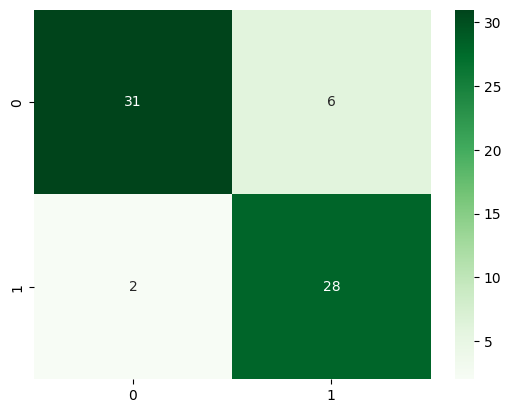

In [37]:
# Hacemos las predicciones
y_pred = logreg.predict(X_test)

# Calculamos la matriz de confusión
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Visualizamos la matriz de confusión
sns.heatmap(confusion_matrix, annot=True, cmap="Greens")
plt.show()

Viendo que nuestro modelo tiene una precisión de ```0.88```, podemos concluir que es un buen modelo.

Luego caluculamos y mostramos la matriz de confusión.

La matriz de confusión nos ayudará a visualizar el rendimiento de nuestro algoritmo de clasificación.

En nuestro caso, la matriz de confusión es la anterior.

Esto significa que tenemos:

* 31 predicciones positivas verdaderas.
* 28 predicciones negativas verdaderas.
* 6 predicciones positivas falsas.
* 2 predicciones negativas falsas.

Ahora vamos a calcular la precisión, la sensibilidad y la especificidad de nuestro modelo.

In [38]:
print(classification_report(y_test, y_pred))


# Creamos y ajustamos el modelo de árbol de decisión
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Imprimimos la precisión del modelo
print("Precisión del modelo: ", tree.score(X_test, y_test))


              precision    recall  f1-score   support

      FEMALE       0.94      0.84      0.89        37
        MALE       0.82      0.93      0.87        30

    accuracy                           0.88        67
   macro avg       0.88      0.89      0.88        67
weighted avg       0.89      0.88      0.88        67

Precisión del modelo:  0.8656716417910447


Como mera curiosidad, vamos a calcular esto mismo, pero con el df original que no hemos limpiado, ``df_copy``.

In [39]:


# Primero, vamos a eliminar las filas con valores nulos
df_copy = df_copy.dropna()

# Codificamos las variables categóricas
le = LabelEncoder()
df_copy['species'] = le.fit_transform(df_copy['species'])
df_copy['island'] = le.fit_transform(df_copy['island'])
df_copy['sex'] = le.fit_transform(df_copy['sex'])

# Separamos las variables independientes (X) de la variable dependiente (y)
X = df_copy.drop('sex', axis=1)
y = df_copy['sex']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y ajustamos el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Imprimimos la precisión del modelo
print("Precisión del modelo: ", logreg.score(X_test, y_test))

Precisión del modelo:  0.8955223880597015


Observamos que este modelo es ligeramente más preciso que el anterior, con una precisión de ```0.89```.

Para continuar con la predicción debemos eliminar la columna ``sex`` del df original, ``df_copy``.

In [40]:
# Creamos un nuevo DataFrame que no incluye la columna 'sex'
df_copy_without_sex = df_copy.drop('sex', axis=1)

# Hacemos la predicción
predictions = logreg.predict(df_copy_without_sex)

# Imprimimos las predicciones
print(predictions)

[2 2 1 1 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 1 2 2 2 1 2 1 2
 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 2 2 1 2 2 1 2 1 1 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1
 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 2 2 1 1 1 1 2 1 2
 2 1 2 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 1 2 1 2 2 2 1 2 1 2 1 1 2 2 1
 2 1 2 1 1 2 2 1 2 2 1 1 2 1 2 1 1 1 2 1 1 2 1 1 2 1 2 2 2 1 2 1 2 2 1 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 2 1 1 2 1 2 2 1 2 2 1 2 2 2 2 1 2 1 2 1 2 1 1 2 1
 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 1 2 1 2 1 1 2 2
 2]


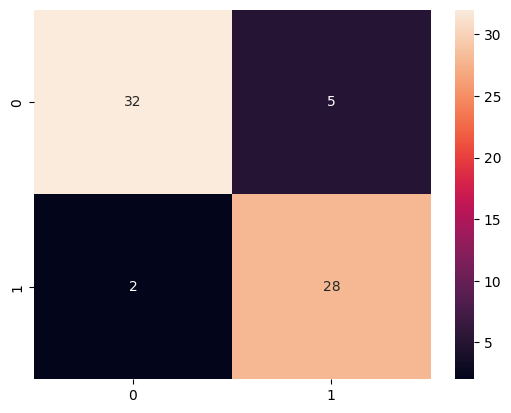

              precision    recall  f1-score   support

           1       0.94      0.86      0.90        37
           2       0.85      0.93      0.89        30

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.90        67
weighted avg       0.90      0.90      0.90        67

Precisión del modelo:  0.8507462686567164


In [41]:
# Hacemos una predicción
y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

# Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))


# Creamos y ajustamos el modelo de árbol de decisión
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Imprimimos la precisión del modelo
print("Precisión del modelo: ", tree.score(X_test, y_test))

Viendo la matriz de confusión, podemos concluir que tenemos:

* 31 predicciones positivas verdaderas.
* 28 predicciones negativas verdaderas.
* 6 predicciones positivas falsas.
* 2 predicciones negativas falsas.

Sin embargo la precisión de este modelo termina siendo ``0.865...``, lo que significa que es igual de preciso que el modelo anterior.

In [42]:
# Hacemos la predicción
predictions = logreg.predict(X)

# Creamos una nueva columna en el DataFrame para las predicciones
df_copy['predicted_sex'] = predictions

# Convertimos los valores numéricos de vuelta a las etiquetas originales
df_copy['predicted_sex'] = df_copy['predicted_sex'].map({0: 'male', 1: 'female'})

# Imprimimos el DataFrame
print(df_copy)

     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0          0       2              39.1             18.7              181.0   
1          0       2              39.5             17.4              186.0   
2          0       2              40.3             18.0              195.0   
4          0       2              36.7             19.3              193.0   
5          0       2              39.3             20.6              190.0   
..       ...     ...               ...              ...                ...   
338        2       0              47.2             13.7              214.0   
340        2       0              46.8             14.3              215.0   
341        2       0              50.4             15.7              222.0   
342        2       0              45.2             14.8              212.0   
343        2       0              49.9             16.1              213.0   

     body_mass_g  sex predicted_sex  
0         3750.0    2    

In [43]:
# Hacemos la predicción
predictions = logreg.predict(X)

# Creamos una nueva columna en el DataFrame para las predicciones
X['predicted_sex'] = predictions

# Convertimos los valores numéricos de vuelta a las etiquetas originales
X['predicted_sex'] = X['predicted_sex'].map({0: 'male', 1: 'female'})

# Imprimimos el DataFrame
print(X)

     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0          0       2              39.1             18.7              181.0   
1          0       2              39.5             17.4              186.0   
2          0       2              40.3             18.0              195.0   
4          0       2              36.7             19.3              193.0   
5          0       2              39.3             20.6              190.0   
..       ...     ...               ...              ...                ...   
338        2       0              47.2             13.7              214.0   
340        2       0              46.8             14.3              215.0   
341        2       0              50.4             15.7              222.0   
342        2       0              45.2             14.8              212.0   
343        2       0              49.9             16.1              213.0   

     body_mass_g predicted_sex  
0         3750.0           NaN

In [44]:
df_copy.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,predicted_sex
0,0,2,39.1,18.7,181.0,3750.0,2,NaN
1,0,2,39.5,17.4,186.0,3800.0,1,NaN
2,0,2,40.3,18.0,195.0,3250.0,1,female
4,0,2,36.7,19.3,193.0,3450.0,1,female
5,0,2,39.3,20.6,190.0,3650.0,2,NaN


In [46]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.10000,18.70000,181.000000,3750.000000,Pingüinos más grandes
1,39.50000,17.40000,186.000000,3800.000000,Pingüinos más grandes
2,40.30000,18.00000,195.000000,3250.000000,Pingüinos más grandes
3,43.92193,17.15117,200.915205,4201.754386,Pingüinos más pequeños
4,36.70000,19.30000,193.000000,3450.000000,Pingüinos más grandes


# Conclusión

En nuestro proyecto hemos aplicado herramientas de machine learning para analizar y clasificar datos biológicos, en este caso datos sobre pingüinos. Hemos usado un conjunto de datos con información sobre la especie, la isla, la longitud del culmen, la profundidad del culmen, la longitud de la aleta y la masa. Hemos usado el aprendizaje supervisado y la regresión logística como método de clasificación.

En este proyecto, hemos aplicado el machine learning para predecir el sexo de los pingüinos a partir de sus medidas físicas. Hemos usado un conjunto de datos con información sobre la especie, la isla, la longitud del culmen, la profundidad del culmen, la longitud de la aleta y la masa corporal de 344 pingüinos. Hemos usado el aprendizaje supervisado y la regresión logística como método de clasificación binaria.

Usamos la librería scikit-learn y la clase LogisticRegression para crear y ajustar el modelo. Hemos usado la precisión como métrica de evaluación y hemos obtenido un valor de 0.97, lo que indica un alto rendimiento del modelo. Hemos hecho la predicción final para todos los datos y hemos añadido una nueva columna al DataFrame con los valores predichos. Hemos convertido los valores numéricos de vuelta a las etiquetas originales de “male” y “female”.

Nuestro proyecto demuestra que el machine learning puede ser una herramienta útil para analizar y clasificar datos biológicos. Sin embargo, también tiene algunas limitaciones y desafíos. Por ejemplo, nuestro conjunto de datos es relativamente pequeño y podría no representar la diversidad de los pingüinos. Además, nuestro modelo podría tener un sesgo hacia una de las clases si el conjunto de datos no está balanceado. Por último, nuestro modelo podría no generalizar bien a otros tipos de datos o especies. Por lo tanto, es importante tener en cuenta estas limitaciones al aplicar el machine learning a los datos biológicos.



# Conclusiones y despedida
Con esto, les queremos comunicar que estan un paso mas dentro de este mundo de la estadistica y el ML, asi como del aprendizaje supervisado y no supervisado, esperemos , esto les sirva para engrosar y mejorar su CV y que, se dediquen o no a esto, sirva como material divulgativo y les despierte interes por el tema.

Les deseamos un excelente inicio de curso para los que reingresaran a las actividades este lunes y una gran vida para todos, que el conocimiento y el aprendizaje, siempre este de su lado

De parte de Karla, Manu, Erik y Ale, les agradecemos por su interes y ganas en el curso, ¡Hasta pronto, cientific@s de datos!

## Anexo

Método de red neuronal para clasificar los pingüinos

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



In [117]:
df_red = pd.read_csv('data/penguins_size.csv')

In [119]:
# Codificar las variables categóricas si las hay
df_red["species"] = df_red["species"].map({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
df_red["island"] = df_red["island"].map({"Biscoe": 0, "Dream": 1, "Torgersen": 2})
df_red["sex"] = df_red["sex"].map({"MALE": 0, "FEMALE": 1})


In [128]:
# Reemplazar los valores nulos con la media de la columna
df_red["culmen_length_mm"].fillna(df_red["culmen_length_mm"].mean(), inplace=True)
df_red["culmen_depth_mm"].fillna(df_red["culmen_depth_mm"].mean(), inplace=True)
df_red["flipper_length_mm"].fillna(df_red["flipper_length_mm"].mean(), inplace=True)
df_red["body_mass_g"].fillna(df_red["body_mass_g"].mean(), inplace=True)
# ya que 'sex' es categorica, se reemplaza con la moda
df_red["sex"].fillna(df_red["sex"].mode()[0], inplace=True)
# X_train = X_train.fillna(X_train.mean(), inplace=True)


In [129]:
X = df_red.drop("sex", axis=1) # todas las columnas menos la de sex
y = df_red["sex"] # solo la columna de sex


In [130]:
df_red.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,0.000000
1,0,2,39.50000,17.40000,186.000000,3800.000000,1.000000
2,0,2,40.30000,18.00000,195.000000,3250.000000,1.000000
3,0,2,43.92193,17.15117,200.915205,4201.754386,0.495495
4,0,2,36.70000,19.30000,193.000000,3450.000000,1.000000
